In [ ]:
import pandas as pd
k = '/content/bank.zip'
df = pd.read_csv(k)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
#What are the summary statistics (mean, median, standard deviation, skewness, and kurtosis) for key numerical variables such as balance, credit score, and transaction count?
# Calculate summary statistics
numerical_features = ['Balance', 'CreditScore', 'EstimatedSalary']
summary_stats = df[numerical_features].agg(['mean', 'median', 'std', 'skew', 'kurt'])
# Display the results
print(summary_stats)



             Balance  CreditScore  EstimatedSalary
mean    76485.889288   650.528800    100090.239881
median  97198.540000   652.000000    100193.915000
std     62397.405202    96.653299     57510.492818
skew       -0.141109    -0.071607         0.002085
kurt       -1.489412    -0.425726        -1.181518


In [ ]:
#What is the distribution of customers by gender, geography, and age?

gender_dist = df.groupby('Gender')['Gender'].count()
geography_dist = df.groupby('Geography')['Geography'].count()
age_dist = df.groupby('Age')['Age'].count()

# Display the results
print("Distribution by Gender:\n", gender_dist)
print("\nDistribution by Geography:\n", geography_dist)
print("\nDistribution by Age:\n", age_dist)


Distribution by Gender:
 Gender
Female    4543
Male      5457
Name: Gender, dtype: int64

Distribution by Geography:
 Geography
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Distribution by Age:
 Age
18    22
19    27
20    40
21    53
22    84
      ..
83     1
84     2
85     1
88     1
92     2
Name: Age, Length: 70, dtype: int64


In [ ]:
# Calculate minimum, maximum, and average estimated salary for active vs. inactive customers
salary_stats = df.groupby('IsActiveMember')['EstimatedSalary'].agg(['min', 'max', 'mean'])

# Display the results
print(salary_stats)

                  min        max           mean
IsActiveMember                                 
0               91.75  199992.48  100767.203854
1               11.58  199953.33   99452.965894


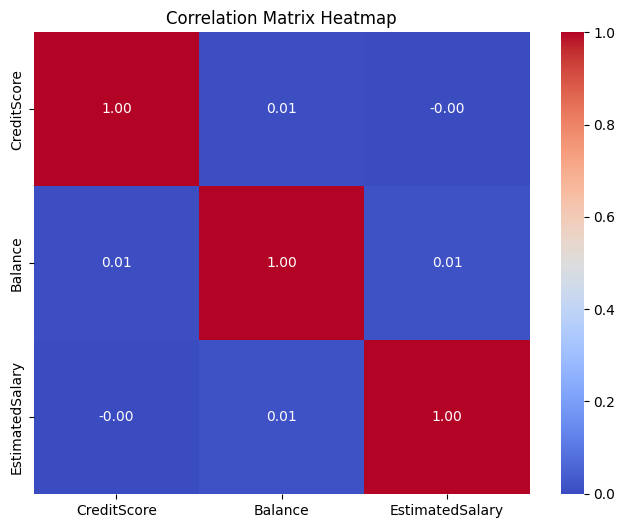

In [ ]:
#How are variables like credit score, balance, and transaction count related?
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
correlation_matrix = df[['CreditScore', 'Balance', 'EstimatedSalary']].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

             Balance                          EstimatedSalary              \
                mean     median           std            mean      median   
Exited                                                                      
0       72742.750663   92063.06  62851.577108    99726.853141   99620.355   
1       91109.476006  109344.23  58346.483197   101509.908783  102489.335   

                      
                 std  
Exited                
0       57399.956717  
1       57932.623392  


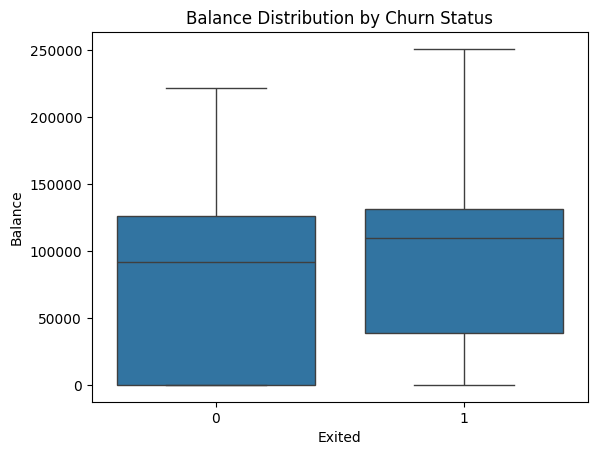

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df' and the churn column is named 'Exited'
churn_stats = df.groupby('Exited')[['Balance', 'EstimatedSalary']].agg(['mean', 'median', 'std'])

# Display the results
print(churn_stats)

import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for balance
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Balance Distribution by Churn Status')
plt.show()


In [ ]:
#What is the probability that a customer has both a low credit score and a high balance?
low_credit_threshold = 600  # Example threshold, adjust as needed
high_balance_threshold = 10000  # Example threshold, adjust as needed
low_credit_high_balance = df[
    (df['CreditScore'] < low_credit_threshold) & (df['Balance'] > high_balance_threshold)
]

probability = len(low_credit_high_balance) / len(df)
print(f"Probability of low credit score and high balance: {probability:.4f}")

Probability of low credit score and high balance: 0.1910
